# 0. 라이브러리 설치

In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.1-py3-none-any.whl size=190074 sha256=7623d258b7458890e4fe77445639ddf4961f5a4ca35afde56a2272f9a251967b
  Stored in directory: /root/.cache/pip/wheels/a3/42/d7/48a53ffc1466bd63932f28583c64ebf442114db14a0bfa8c95
Successfully built pyod


# 1. 라이브러리 로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

from pyod.models.iforest import IForest
from pyod.models.pca import PCA

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

import tensorflow as tf

import seaborn as sns
sns.set_style('white')

import warnings
warnings.filterwarnings(action='ignore')

# 2. 모델링 데이터셋 생성

In [4]:
'''# 정상 데이터 생성
X_normal, y_normal = make_blobs(n_samples=1000, centers=1, n_features=5, cluster_std=1, random_state=0, center_box=(5,9))
df_normal = pd.DataFrame(X_normal, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
df_normal['anomaly_indicator']=0'''

"# 정상 데이터 생성\nX_normal, y_normal = make_blobs(n_samples=1000, centers=1, n_features=5, cluster_std=1, random_state=0, center_box=(5,9))\ndf_normal = pd.DataFrame(X_normal, columns=['x1', 'x2', 'x3', 'x4', 'x5'])\ndf_normal['anomaly_indicator']=0"

In [5]:
'''# 이상 데이터 생성
X_abnormal, y_abnormal = make_blobs(n_samples=100, centers=5, n_features=5, cluster_std=10, random_state=0, center_box=(10,12))
df_abnormal = pd.DataFrame(X_abnormal, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
df_abnormal['anomaly_indicator']=1'''

"# 이상 데이터 생성\nX_abnormal, y_abnormal = make_blobs(n_samples=100, centers=5, n_features=5, cluster_std=10, random_state=0, center_box=(10,12))\ndf_abnormal = pd.DataFrame(X_abnormal, columns=['x1', 'x2', 'x3', 'x4', 'x5'])\ndf_abnormal['anomaly_indicator']=1"

In [6]:
'''# 이상 데이터, 정상데이터 combine
df = pd.concat([df_normal, df_abnormal])
df'''

'# 이상 데이터, 정상데이터 combine\ndf = pd.concat([df_normal, df_abnormal])\ndf'

In [7]:
df = pd.read_csv('/content/drive/MyDrive/인지응/mammography.csv')
#df.columns = ['Area of object', 'Average gray level of the object', 'Gradient strength of the object's perimeter pixels','Root mean square noise fluctuation in the object','Average gray level of the object minus the average of a two-pixel wide border surrounding','A low order moment based on shape descriptor','Cancer']
df

,Area of object,Average gray level of the object,Gradient strength of the object's perimeter pixels,Root mean square noise fluctuation in the object,Average gray level of the object minus the average of a two-pixel wide border surrounding,A low order moment based on shape descriptor,Cancer
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,0
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,0
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0
...,...,...,...,...,...,...,...
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,1
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,1
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,1
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,1


In [8]:
df_normal = df.loc[df['Cancer']== 0]
df_abnormal = df.loc[df['Cancer']== 1]

# 3. 탐색적 데이터 분석

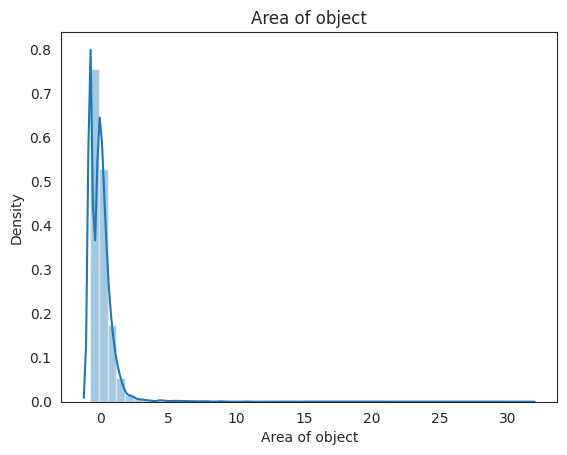

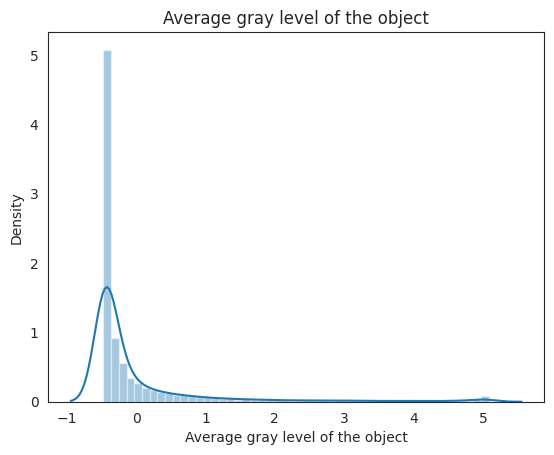

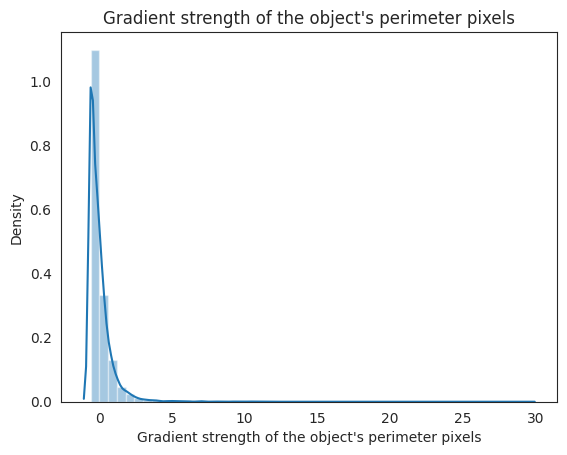

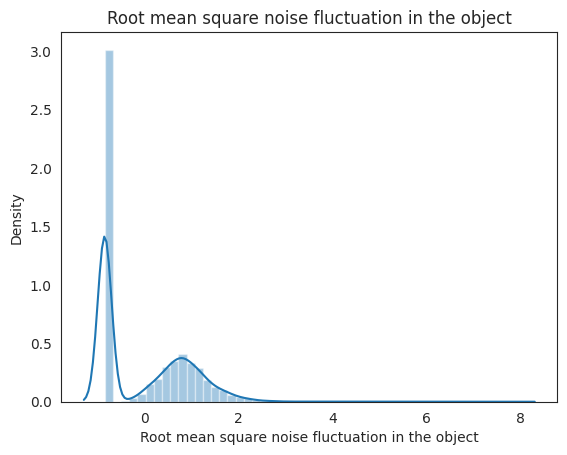

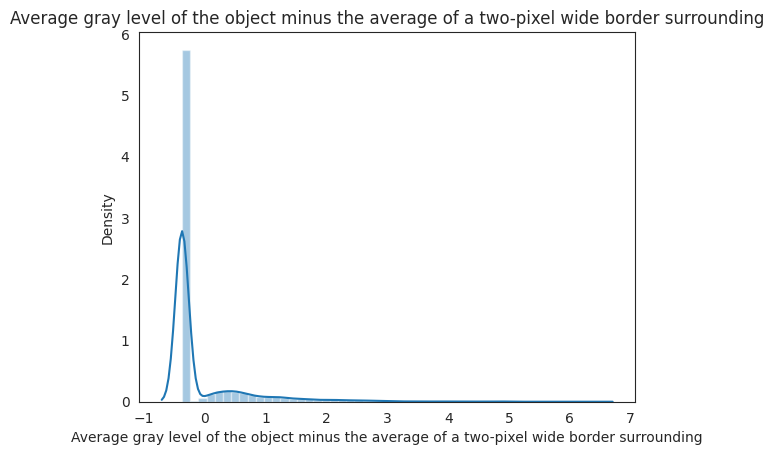

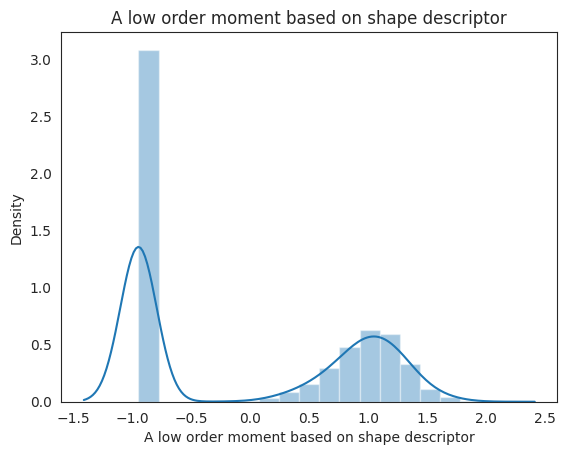

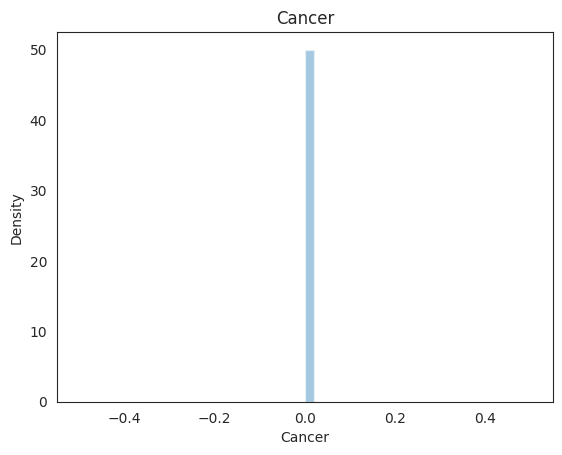

In [9]:
for col in df.columns:
    sns.distplot(df_normal.loc[df_normal[col].notnull(), col])
    plt.title(col)
    plt.show()

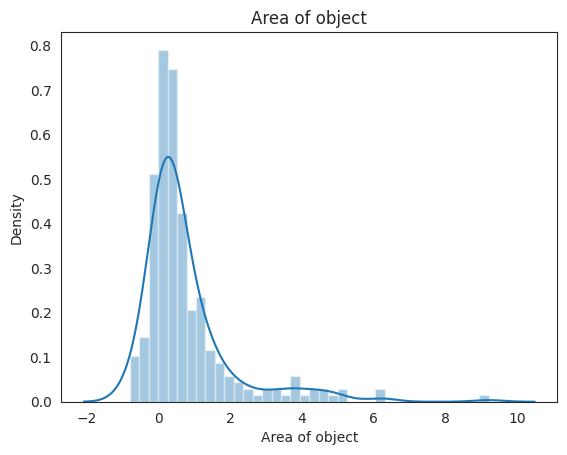

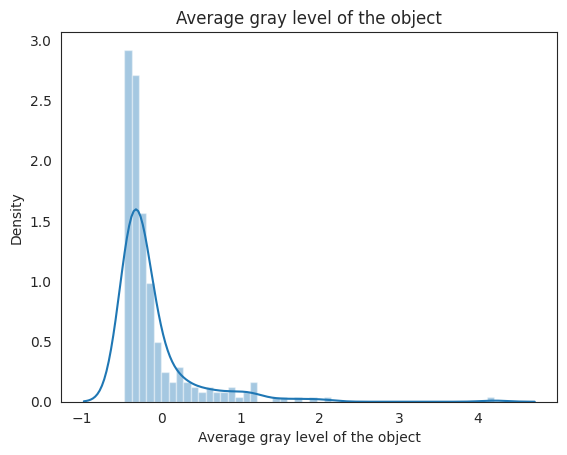

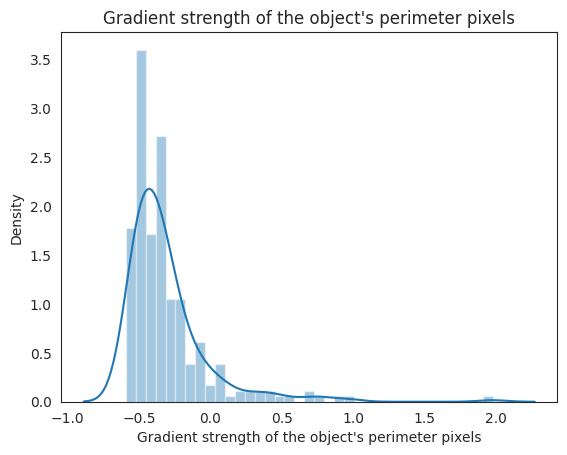

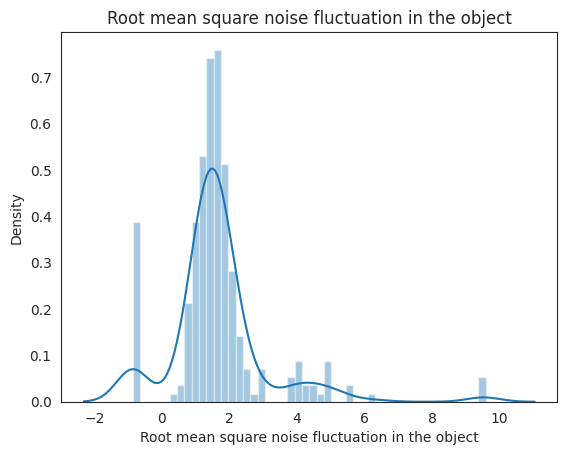

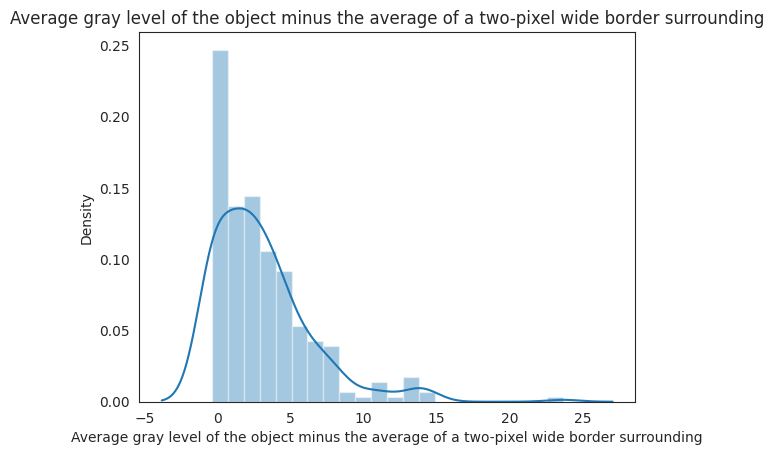

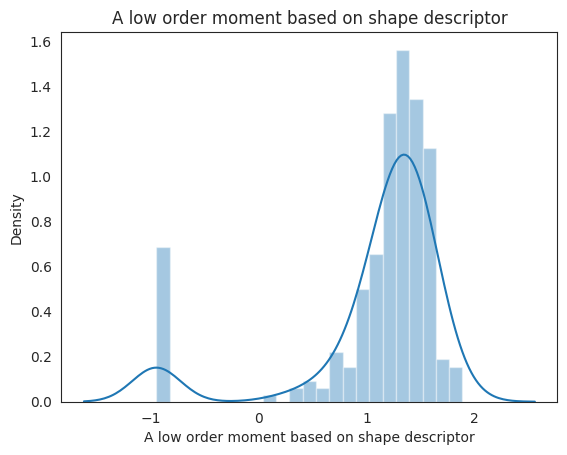

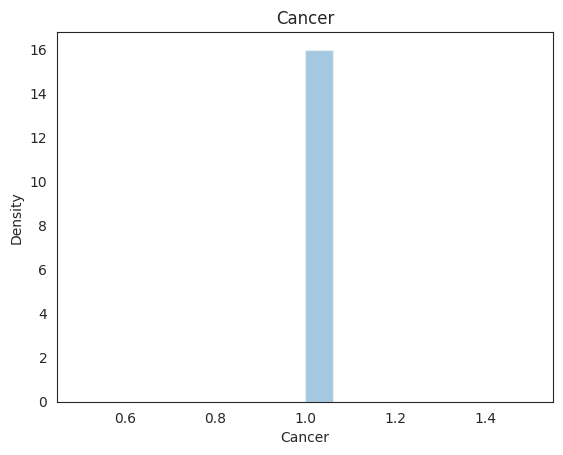

In [10]:
# 이상 데이터의 변수별 분포 확인

for col in df.columns:
    sns.distplot(df_abnormal.loc[df_abnormal[col].notnull(), col])
    plt.title(col)
    plt.show()

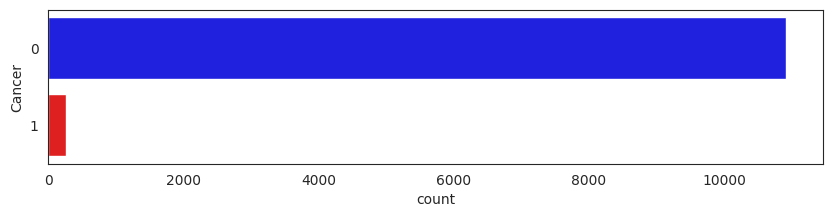

In [11]:
# 정상 데이터와 이상 데이터 클래수 비교
plt.figure(figsize=(10,2))
fig = sns.countplot(y=df['Cancer'], data=df, palette=["blue", "red"])
plt.show()

In [12]:
# 정상 데이터의 100개 랜덤 샘플링
test_normal_df = df_normal.sample(n = 260, random_state = 0)
test_normal_df

,Area of object,Average gray level of the object,Gradient strength of the object's perimeter pixels,Root mean square noise fluctuation in the object,Average gray level of the object minus the average of a two-pixel wide border surrounding,A low order moment based on shape descriptor,Cancer
2572,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0
8589,1.472952,0.418949,-0.050653,1.368313,-0.377866,1.172015,0
6940,1.153326,1.277128,-0.456387,1.410508,-0.377866,0.388909,0
528,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0
1492,-0.060472,-0.394994,0.129673,-0.859553,-0.377866,-0.945723,0
...,...,...,...,...,...,...,...
5225,0.196312,-0.103036,0.760815,0.857761,0.021189,1.236005,0
5625,-0.329791,-0.315369,7.793539,-0.069673,-0.377866,0.845975,0
5161,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0
4758,-0.784415,-0.470195,-0.591631,-0.859553,-0.377866,-0.945723,0


In [13]:
df_abnormal

,Area of object,Average gray level of the object,Gradient strength of the object's perimeter pixels,Root mean square noise fluctuation in the object,Average gray level of the object minus the average of a two-pixel wide border surrounding,A low order moment based on shape descriptor,Cancer
1093,-0.335889,-0.452501,-0.591631,0.817254,-0.377866,1.034896,1
1094,4.592985,1.918550,-0.456387,2.264523,1.918840,0.702761,1
1095,0.660252,-0.377300,-0.411305,1.708400,3.520855,1.400548,1
1096,-0.321830,-0.452501,-0.276061,1.325275,13.750423,1.013566,1
1097,-0.520347,-0.452501,-0.276061,3.001660,13.750423,0.702761,1
...,...,...,...,...,...,...,...
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,1
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,1
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,1
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,1


In [14]:
# 정상 데이터 100개 + 이상 데이터 100개 concat 하여 test 데이터셋 생성
test_df = pd.concat([df_abnormal, test_normal_df])

In [15]:
# test 데이터 셋 => X_test, y_test 분할
X_test = test_df[test_df.columns.difference(['Cancer'])]
y_test = test_df["Cancer"]

print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_test: (520, 6) y_test: (520,)


In [16]:
# 나머지 900개 정상 데이터로 train 데이터셋 생성
train_df = df_normal.drop(test_normal_df.index)

# train 데이터 셋 => X_train, y_train 분할
X_train = train_df[train_df.columns.difference(['Cancer'])]
y_train = train_df["Cancer"]

print('X_train:', X_train.shape, 'y_train:', y_train.shape)

X_train: (10663, 6) y_train: (10663,)


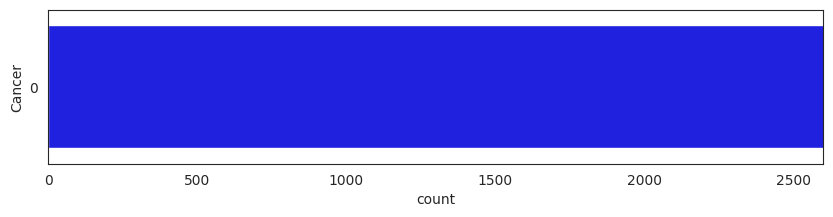

In [17]:
# train 데이터셋은 정상 데이터로만 구성
plt.figure(figsize=(10,2))
fig = sns.countplot(y=train_df['Cancer'], data=train_df, palette=["blue"])
plt.xlim(0, 2600)
plt.show()

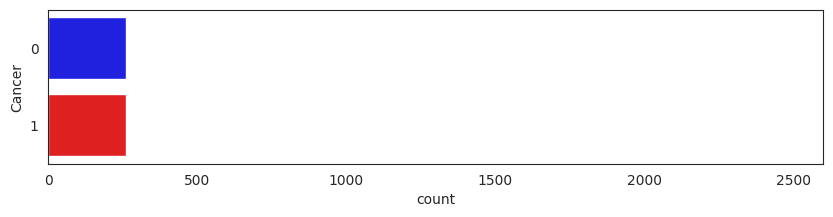

In [18]:
# test dataset은 정상과 이상 일대일 비율로 구성
plt.figure(figsize=(10,2))
fig = sns.countplot(y=test_df['Cancer'], data=test_df, palette=["blue", "red"])
plt.xlim(0, 2600)
plt.show()

# 4. 모델 구축

## 4-1. Isolation Forest

In [19]:
# Isolation Forest 모델 구축
IForest = IForest()
IForest.fit(X_train)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [20]:
# train data에 대한 예측 값(정상=0, 이상=1)
IForest_train_pred = IForest.predict(X_train)
IForest_train_pred

array([1, 0, 1, ..., 0, 0, 0])

In [21]:
# test data에 대한 예측 값(정상=1, 이상=-1)
IForest_test_pred = IForest.predict(X_test)
IForest_test_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
y_test

1093    1
1094    1
1095    1
1096    1
1097    1
       ..
5225    0
5625    0
5161    0
4758    0
7415    0
Name: Cancer, Length: 520, dtype: int64

In [23]:
len(IForest_test_pred)

520

accuracy:  0.7576923076923077
recall:  0.623
precision:  0.853
f1-score:  0.72


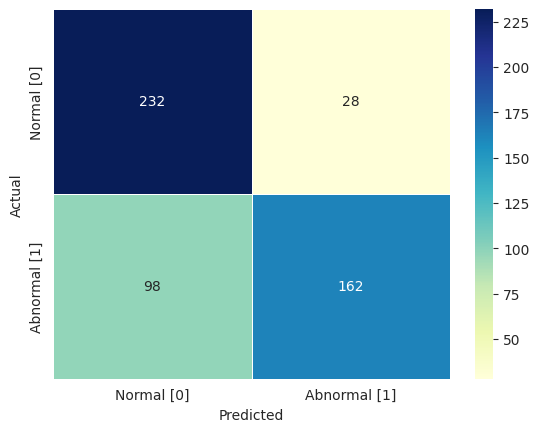

In [24]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, IForest_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, IForest_test_pred))
print("recall: ", round(recall_score(y_test, IForest_test_pred),3))
print("precision: ", round(precision_score(y_test, IForest_test_pred),3))
print("f1-score: ", round(f1_score(y_test, IForest_test_pred),3))

## 4-2. Local Outlier Factor

In [25]:
# LOF 모델 구축
LOF = LocalOutlierFactor(contamination=0.03,novelty=True)
LOF.fit(X_train)

LocalOutlierFactor(contamination=0.01, novelty=True)

In [26]:
# train data에 대한 예측 값(정상=1, 이상=-1)
LOF_train_pred = LOF.predict(X_train)
LOF_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
# test data에 대한 예측 값(정상=1, 이상=-1)
LOF_test_pred = LOF.predict(X_test)

LOF_test_pred = pd.DataFrame(LOF_test_pred)
LOF_test_pred = LOF_test_pred.replace({-1: 1, 1: 0})
LOF_test_pred

,0
0,0
1,1
2,0
3,1
4,1
...,...
515,0
516,0
517,0
518,0


accuracy:  0.6461538461538462
recall:  0.296
precision:  0.987
f1-score:  0.456


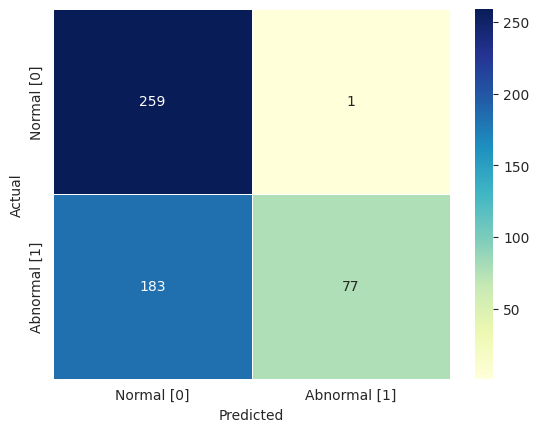

In [28]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, LOF_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, LOF_test_pred))
print("recall: ", round(recall_score(y_test, LOF_test_pred),3))
print("precision: ", round(precision_score(y_test, LOF_test_pred),3))
print("f1-score: ", round(f1_score(y_test, LOF_test_pred),3))

## 4-3. Pricipal Component Analysis

In [29]:
PCA = PCA()
PCA.fit(X_train)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [30]:
# train data에 대한 예측 값(정상=0, 이상=1)
PCA_train_pred = PCA.predict(X_train)
PCA_train_pred

array([1, 0, 1, ..., 0, 0, 0])

In [31]:
# train data에 대한 예측 값(정상=0, 이상=1)
PCA_test_pred = PCA.predict(X_test)
PCA_test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

accuracy:  0.8057692307692308
recall:  0.696
precision:  0.892
f1-score:  0.782


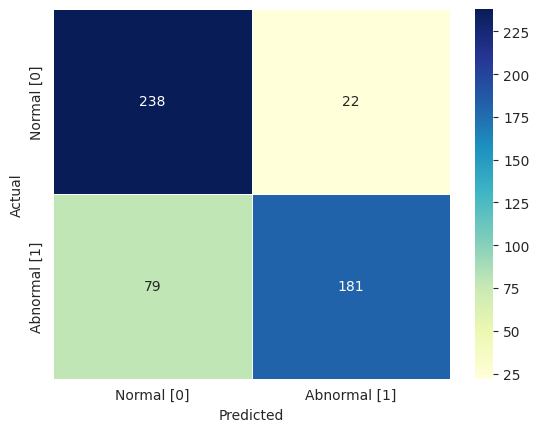

In [32]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, PCA_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, PCA_test_pred))
print("recall: ", round(recall_score(y_test, PCA_test_pred),3))
print("precision: ", round(precision_score(y_test, PCA_test_pred),3))
print("f1-score: ", round(f1_score(y_test, PCA_test_pred),3))

In [75]:
input_dim

6

## 4-4. Auto-Encoder

In [158]:
input_dim = X_train.shape[1]

AE = tf.keras.models.Sequential([

    # encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu'),
    #tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

AE.compile(optimizer="adam", loss="mse")
AE.summary();

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 6)                 42        
                                                                 
 dense_23 (Dense)            (None, 4)                 28        
                                                                 
 dense_24 (Dense)            (None, 2)                 10        
                                                                 
 dense_25 (Dense)            (None, 4)                 12        
                                                                 
 dense_26 (Dense)            (None, 6)                 30        
                                                                 
Total params: 122 (488.00 Byte)
Trainable params: 122 (488.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
history = AE.fit(
    X_train,
    X_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/200
267/267 [==============================] - 1s 4ms/step - loss: 0.0493 - val_loss: 0.0499
Epoch 2/200
267/267 [==============================] - 1s 5ms/step - loss: 0.0492 - val_loss: 0.0492
Epoch 3/200
267/267 [==============================] - 3s 10ms/step - loss: 0.0491 - val_loss: 0.0512
Epoch 4/200
267/267 [==============================] - 2s 8ms/step - loss: 0.0495 - val_loss: 0.0499
Epoch 5/200
267/267 [==============================] - 1s 4ms/step - loss: 0.0492 - val_loss: 0.0493
Epoch 6/200
267/267 [==============================] - 1s 3ms/step - loss: 0.0495 - val_loss: 0.0654
Epoch 7/200
267/267 [==============================] - 1s 3ms/step - loss: 0.0498 - val_loss: 0.0494
Epoch 8/200
267/267 [==============================] - 1s 3ms/step - loss: 0.0494 - val_loss: 0.0494
Epoch 9/200
267/267 [==============================] - 1s 3ms/step - loss: 0.0491 - val_loss: 0.0494
Epoch 10/200
267/267 [==============================] - 1s 3ms/step - loss: 0.0493 - val_l

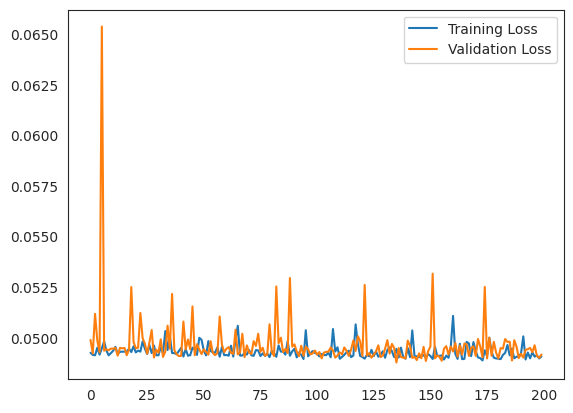

In [194]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [195]:
# train data에 대한 예측 값
AE_train_pred = AE.predict(X_train)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의 -> Novelty Score
train_mse = np.mean(np.power(X_train - AE_train_pred, 2), axis=1)
train_mse = pd.DataFrame({'Reconstruction_error': train_mse})
train_mse

334/334 [==============================] - 1s 1ms/step


,Reconstruction_error
0,0.301508
1,0.020530
2,0.004807
3,0.007770
4,0.025888
...,...
11152,0.003878
11153,0.003878
11154,0.006048
11155,0.003878


In [196]:
# train 데이터에 대한 novelty score 기준 상위 10% 의 값을 임계치로 설정
AE_thresh = np.percentile(sorted(train_mse['Reconstruction_error']), 90)
AE_thresh

0.10768130171571201

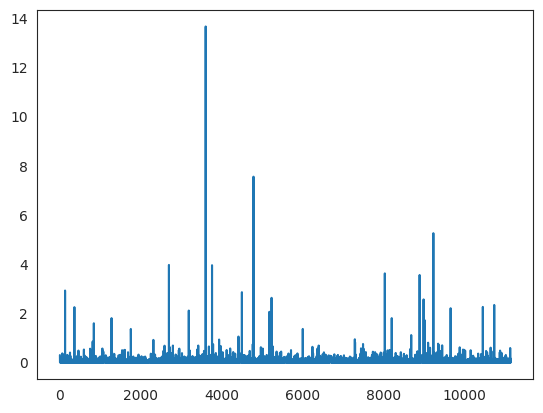

In [197]:
plt.plot(train_mse)

In [198]:
# test data에 대한 예측 값
AE_test_pred = AE.predict(X_test)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의
test_mse = np.mean(np.power(X_test - AE_test_pred, 2), axis=1)
test_mse

17/17 [==============================] - 0s 2ms/step


1093      0.116216
1094      2.552063
1095      0.421481
1096    132.443196
1097     99.646791
           ...    
5225      0.036688
5625      0.082530
5161      0.003878
4758      0.003878
7415      0.075063
Length: 520, dtype: float64

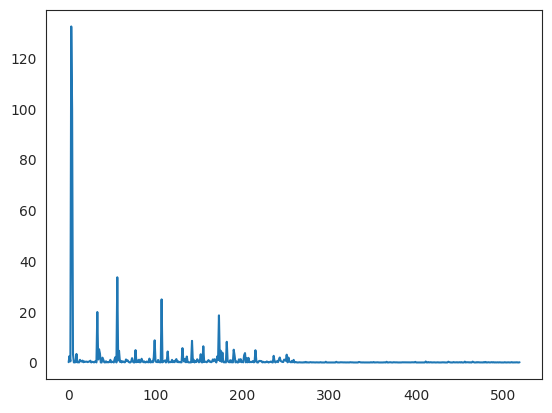

In [199]:
plt.plot(test_mse.values)

In [200]:
# classifier
# AE_thresh 기준, test_mse 값이 더 크면 이상(1), 작으면 정상(0)으로 분류
AE_test_df = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > AE_thresh:
            AE_test_df.append(1)
        else:
            AE_test_df.append(0)

In [201]:
novelty_classifier(test_mse.values)

accuracy:  0.7942307692307692
recall:  0.7
precision:  0.863
f1-score:  0.773


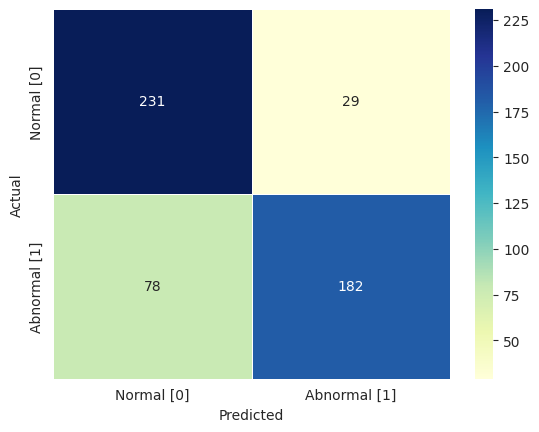

In [202]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, AE_test_df) #confusion_matrix 함수 실행

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'],
            yticklabels=['Normal [0]', 'Abnormal [1]'],
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test, AE_test_df))
print("recall: ", round(recall_score(y_test, AE_test_df),3))
print("precision: ", round(precision_score(y_test, AE_test_df),3))
print("f1-score: ", round(f1_score(y_test, AE_test_df),3))

In [203]:
from pyod.models.hbos import HBOS
from pyod.utils.data import generate_data

model = HBOS()
model.fit(X_train)

# 이상치 점수 계산
y_scores = model.decision_function(X_test)

# 이상치 예측
y_pred = model.predict(X_test)